# EDA of Twitter Mental Disorder Tweets and Music Preferences Dataset

* Author: Alperen Demirci [LinkedIn](https://www.linkedin.com/in/alperendemirci)

- In this notebook, we will do exploratory data analysis of the dataset. We will try to understand the dataset by visualizing the data and making some analysis.

- Actully we have two datasets in this notebook. One of them is about Twitter Mental Disorder Tweets and the other one is about Music Preferences. We will analyze both of them.

- Dataset Link = [Twitter Mental Disorder Tweets and Music Preferences](https://www.kaggle.com/datasets/rrmartin/twitter-mental-disorder-tweets-and-musics?select=anon_disorder_tweets.tar.xz)

- Datasets:
    - `anon_control_musics.csv`
    - `anon_disorder_musics.csv`
    - `anon_control_tweets.csv`
    - `anon_disorder_tweets.csv`


- Let's start with loading the anon_control_tweets.csv dataset and continue with the other datasets.


- Importing necessary libraries and loading the dataset:

In [1]:
import pandas
import nltk
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pandas.read_csv('data/anon_disorder_tweets.csv', encoding='utf-8' )

In [3]:
data.head()

,Unnamed: 0,user_id,text,disorder
0,0,3f21058fc8,@amirulmokhtar Exactly! We were busy buat untu...,anxiety
1,1,3f21058fc8,Ternangis baca text &amp; dengar call reply di...,anxiety
2,2,3f21058fc8,I learn smthg very valuable today.\n\nWhen I w...,anxiety
3,3,3f21058fc8,"@MintKr Ohhh okay. So, to create more opportun...",anxiety
4,4,3f21058fc8,@MintKr Perspective expanding experience tu ap...,anxiety


In [4]:
data.columns

Index(['Unnamed: 0', 'user_id', 'text', 'disorder'], dtype='object')

* Our datasets columns are as follows : ['Unnamed: 0', 'user_id', 'text', 'disorder'] and their data types are all object.
* Let's check the Unnamed: 0 column and if it is unnecessary, we will drop it. I think it resembles the index column.

In [5]:
data['Unnamed: 0'].value_counts()

Unnamed: 0
0           1
21460921    1
21460919    1
21460918    1
21460917    1
           ..
10730452    1
10730451    1
10730450    1
10730449    1
32191367    1
Name: count, Length: 32191368, dtype: int64

In [6]:
data['Unnamed: 0'].nunique()

32191368

In [7]:
len(data)

32191368

In [8]:
all(data.index == data['Unnamed: 0'])

True

* As you can see, the columns 'Unnamed: 0' is exactly the same as the index column. So, we can drop it.

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True) 

In [10]:
data.head()

,user_id,text,disorder
0,3f21058fc8,@amirulmokhtar Exactly! We were busy buat untu...,anxiety
1,3f21058fc8,Ternangis baca text &amp; dengar call reply di...,anxiety
2,3f21058fc8,I learn smthg very valuable today.\n\nWhen I w...,anxiety
3,3f21058fc8,"@MintKr Ohhh okay. So, to create more opportun...",anxiety
4,3f21058fc8,@MintKr Perspective expanding experience tu ap...,anxiety


* Let's check our attributes and their unique values.

In [11]:
data.describe()

,user_id,text,disorder
count,32191368,32191368,32191368
unique,18169,31302474,6
top,b0798446d1,carp,depression
freq,11822,658,14527850


* We can infer some stats from this table:

    - We have 18169 different users contributed to this dataset.
    - Not all texts are unique. There are some duplicate texts in the dataset.
    - We have 6 different disorder types in the dataset. Just by looking at the most frequent class, we can say that the dataset is imbalanced. We will check it later.

- Let's check our disorder types and their frequencies.

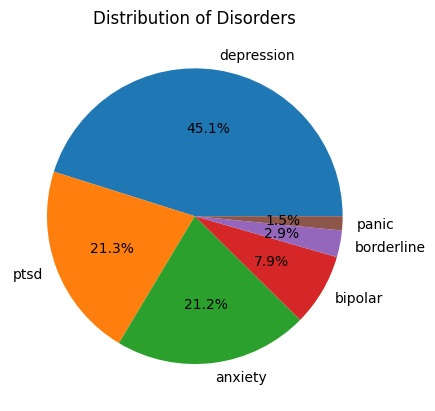

In [12]:
plt.pie(data['disorder'].value_counts(), labels=data['disorder'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Disorders')
plt.show()

In [13]:
data['disorder'].value_counts()

disorder
depression    14527850
ptsd           6854420
anxiety        6826939
bipolar        2546237
borderline      939087
panic           496835
Name: count, dtype: int64

* We can infer some stats from this table:

    - The most frequent disorder type is 'depression'.
    - The least frequent disorder type is 'panic'.

## About the Imbalance Problem:

* Since we unfortunately do not own a server to process this amount of data, we will sample from this dataset. 
* 'disorder' column would be our target feature later on, that is why we need to consider this feature while sampling.
* We will undersample our data due to two reasons above.

- For now, we will only focus on understanding the data since we are on EDA part.

## Infering some stats from the dataset:

### How 'unique' are classes from the user point of view?

In [14]:
data.groupby('disorder')['user_id'].nunique()

disorder
anxiety       3857
bipolar       1471
borderline     540
depression    8471
panic          271
ptsd          3934
Name: user_id, dtype: int64

In [15]:
data.groupby('disorder')['user_id'].count()

disorder
anxiety        6826939
bipolar        2546237
borderline      939087
depression    14527850
panic           496835
ptsd           6854420
Name: user_id, dtype: int64

In [16]:
users_per_disorder = data.groupby('disorder')['user_id'].nunique() / data.groupby('disorder')['user_id'].count()

In [17]:
users_per_disorder

disorder
anxiety       0.000565
bipolar       0.000578
borderline    0.000575
depression    0.000583
panic         0.000545
ptsd          0.000574
Name: user_id, dtype: float64

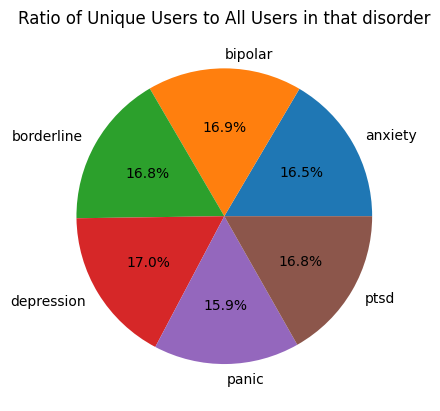

In [18]:
plt.pie(users_per_disorder, labels=users_per_disorder.index, autopct='%1.1f%%')
plt.title('Ratio of Unique Users to All Users in that disorder')
plt.show()

* What we did was to create a new feature to measure the uniqueness of users per disorder. This measurement gives 1 if all the users in that class are unique, 0 if all the users are same in that class.

* We have seen that the all of our classes have similar uniqueness mesaurement from 5.4e-4 and 5.8e-4. These values are really low due to the fact that this metric ranges from 0 to 1.

* Why did we measure this? 
    * We want to make our experiements on different people as much as possible. So, we have checked every class to see if we can directly focus on a class which contains the most unique person per its class.
    * However, our classes have nearly same uniqueness measure; so this measurement did not help directly.

### Does every user belong to one class?

In [19]:
classes_per_user = data.groupby('user_id')['disorder'].nunique()

In [20]:
all(classes_per_user<=1)

False

In [21]:
classes_per_user

user_id
0001e573dc    1
00021bdb1d    2
000398d974    1
0003c5dea3    1
0016e389a3    1
             ..
fff747e293    1
fff927bc35    1
fffe979cef    1
fffeaf51ea    1
ffff027660    1
Name: disorder, Length: 18169, dtype: int64

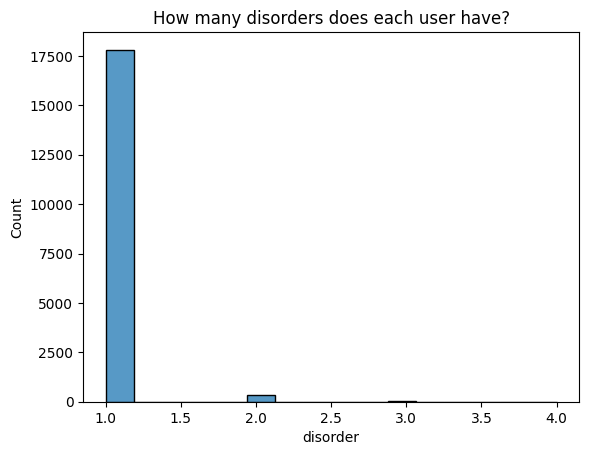

In [22]:
sns.histplot(classes_per_user)
plt.title('How many disorders does each user have?')
plt.show()

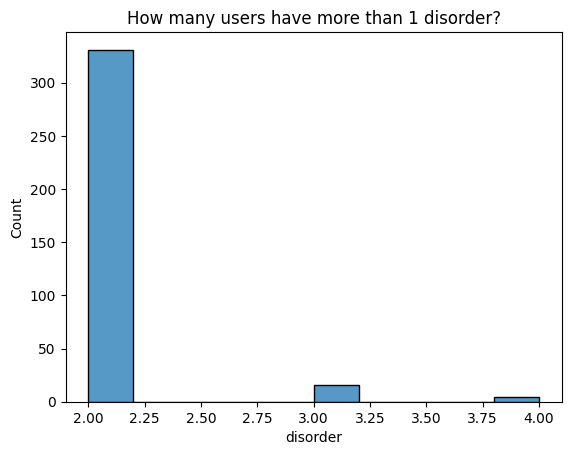

In [23]:
sns.histplot(classes_per_user[classes_per_user>=2])
plt.title('How many users have more than 1 disorder?')
plt.show()

In [24]:
classes_per_user.value_counts()

disorder
1    17818
2      331
3       16
4        4
Name: count, dtype: int64

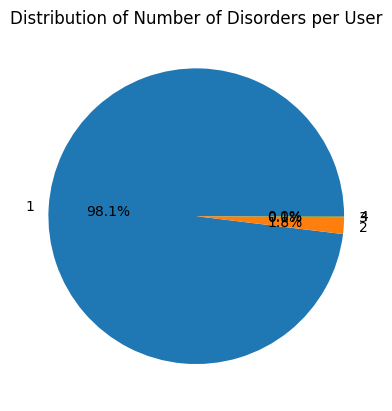

In [25]:
plt.pie(classes_per_user.value_counts(), labels=classes_per_user.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Number of Disorders per User')
plt.show()

* We can see that huge amount of users have only one disorder. However, there are some users who have more than one disorder.
* %98.1 of the users have only one disorder, which can be good for us. Because we want to see as much as different people as possible since it may increase the generalization of our model.
* We can use this distribution while sampling our data. 

### How many links are there in the dataset?

- Maybe some tweets are just links. Let's check it.

In [26]:
link_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

data['has_link'] = data['text'].apply(lambda x: link_pattern.search(x) is not None)

In [27]:
data['has_link'].value_counts()

has_link
False    22656913
True      9534455
Name: count, dtype: int64

* As you see above, nearly %30 of the tweets are links. We can use this information while cleaning the data.
* Let's check the distribution of links among the classes.

In [28]:
link_per_class = data.groupby('disorder')['has_link'].mean()

In [34]:
link_per_class

disorder
anxiety       0.293303
bipolar       0.341601
borderline    0.320013
depression    0.285988
panic         0.279485
ptsd          0.301723
Name: has_link, dtype: float64

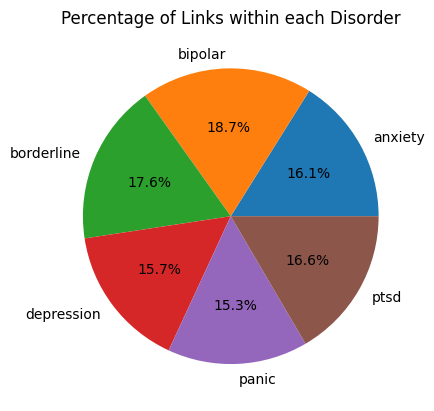

In [32]:
plt.pie(link_per_class, labels=link_per_class.index, autopct='%1.1f%%')
plt.title('Percentage of Links within each Disorder')
plt.show()

* So we can say that the distribution of links within each class are similar.
* This information does not help os to distinguish the classes.

### How many emojis are there in the dataset?

- Maybe there exist some imbalance in the distribution of emojis among the classes. Let's check it.

In [36]:
## chcek if a text has emoji or not

def has_emoji(text):
    emoji_pattern = re.compile(r'[^\w\s,]')
    return emoji_pattern.search(text) is not None

data['has_emoji'] = data['text'].apply(has_emoji)

In [ ]:
data[data['has_emoji']]['text'].iloc[0]

'@amirulmokhtar Exactly! We were busy buat untuk orang, brand sendiri tak buat-buat🤣'

In [44]:
data.groupby('disorder')['has_emoji'].mean()

disorder
anxiety       0.957632
bipolar       0.962884
borderline    0.964785
depression    0.954639
panic         0.961275
ptsd          0.973776
Name: has_emoji, dtype: float64

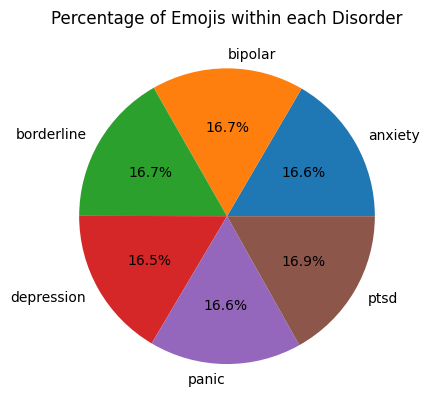

In [46]:
plt.pie(data.groupby('disorder')['has_emoji'].mean(), labels=data.groupby('disorder')['has_emoji'].mean().index, autopct='%1.1f%%')
plt.title('Percentage of Emojis within each Disorder')
plt.show()

* We can see that most of the tweets contains emojis(more than %95). Also we can see that the distribution of emojis among the classes are similar. 
* This information does not help us to distinguish the classes.

### How many hashtags are there in the dataset?

- Maybe there exist some imbalance in the distribution of hashtags among the classes. Let's check it.

In [47]:
## check if a text has a mention or not
data['has_mention'] = data['text'].apply(lambda x: '@' in x)

data['has_mention'].value_counts()

has_mention
True     18411310
False    13780058
Name: count, dtype: int64

In [48]:
data.groupby('disorder')['has_mention'].mean()

disorder
anxiety       0.564494
bipolar       0.506109
borderline    0.530652
depression    0.569329
panic         0.570191
ptsd          0.615095
Name: has_mention, dtype: float64

In [50]:
data[data['has_mention']]['text'].iloc[124]

"@TheAleem Tapi the best is actually cikgu hyemi. my forever unsung hero.\nDalam startup, neneknya.\n\nTapi orang lagi value romance than teacher's sacrifices or family love."

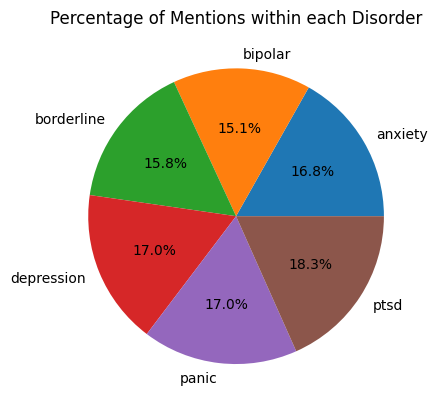

In [51]:
plt.pie(data.groupby('disorder')['has_mention'].mean(), labels=data.groupby('disorder')['has_mention'].mean().index, autopct='%1.1f%%')
plt.title('Percentage of Mentions within each Disorder')
plt.show()

* Nearly within every class, %50 of the tweets contain hashtags. When we check the distribution of hashtags among the classes, we can see that the distribution is similar.

* This information does not help us to distinguish the classes.

### Length of the tweets

- Maybe the length of the tweets can help us to distinguish the classes. Let's check it.
- Also we will check the distribution of the length of the tweets. We can use this information while cleaning the data.

In [52]:
data['text_length'] = data['text'].apply(len)

data['text_length'].describe()

count    3.219137e+07
mean     9.506850e+01
std      7.734987e+01
min      1.000000e+00
25%      3.900000e+01
50%      6.900000e+01
75%      1.250000e+02
max      1.133000e+03
Name: text_length, dtype: float64

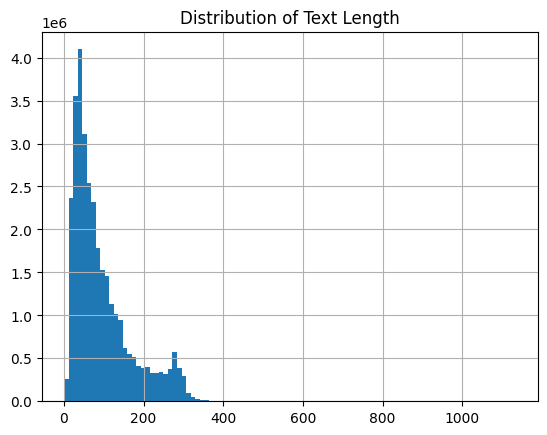

In [57]:
data['text_length'].hist(bins=100)
plt.title('Distribution of Text Length')
plt.show()

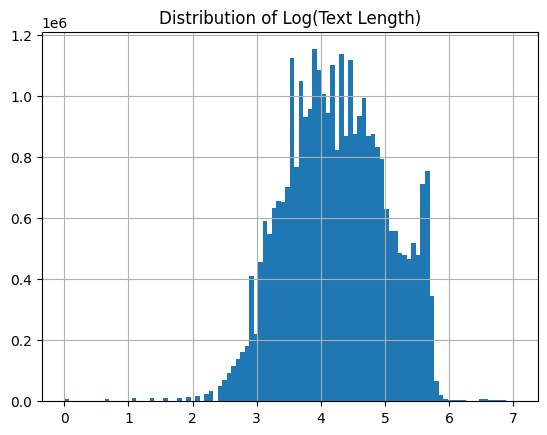

In [58]:
## take the log of the text length to see the distribution better
np.log(data['text_length']).hist(bins=100)
plt.title('Distribution of Log(Text Length)')
plt.show()

* We can see that our distribution of tweet lengths are not similar. The distribution of the tweet lengths are right skewed and the mean of the tweet lengths are around 95 characters.

* However, when we take the log of the tweet lengths, we can see that the distribution is more normal. We can use this information while cleaning the data for outlier removal.

* We may not want to drop too short or too long tweets.

* Let's check our outlier count using IQR method on the log of the tweet lengths.

In [71]:
IQR = np.log(data['text_length']).quantile(0.75) - np.log(data['text_length']).quantile(0.25)
upper_bound = np.log(data['text_length']).quantile(0.75) + 1.5*IQR
lower_bound = np.log(data['text_length']).quantile(0.25) - 1.5*IQR
print('IQR:', IQR)
print('Upper Bound:', upper_bound)
print('Lower Bound:', lower_bound)

IQR: 1.1647520911726552
Upper Bound: 6.575441874061284
Lower Bound: 1.9164335093706635


In [72]:
IQR = np.e**IQR
upper_bound = np.e**upper_bound
lower_bound = np.e**lower_bound

In [73]:
print('IQR:', IQR)
print('Upper Bound:', upper_bound)
print('Lower Bound:', lower_bound)

IQR: 3.2051282051282066
Upper Bound: 717.2624940298813
Lower Bound: 6.796674914103212


In [74]:
print('Number of outliers(upper):', len(data[data['text_length']>upper_bound]))
print('Number of outliers(lower):', len(data[data['text_length']<lower_bound]))

Number of outliers(upper): 20555
Number of outliers(lower): 57728


* You can see that just by using simple statistics, we can detect nearly 78k outliers. We can use this information while cleaning the data.
* Also, there are more than 57.000 entries which have less than 7 characters. 7 characters are just too short for a tweet. We can use this information too while cleaning the data.

* Let's check if we have any imbalance in the distribution of the tweet lengths among the classes.

In [75]:
data.groupby('disorder')['text_length'].mean()

disorder
anxiety        91.013252
bipolar        99.268692
borderline    100.650006
depression     90.343477
panic          98.204931
ptsd          106.569829
Name: text_length, dtype: float64

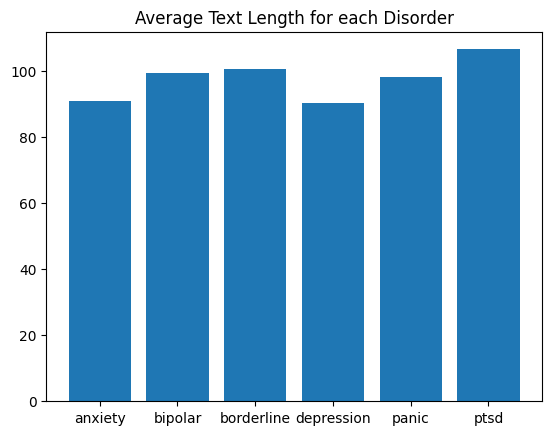

In [78]:
plt.bar(data.groupby('disorder')['text_length'].mean().index, data.groupby('disorder')['text_length'].mean())
plt.title('Average Text Length for each Disorder')
plt.show()

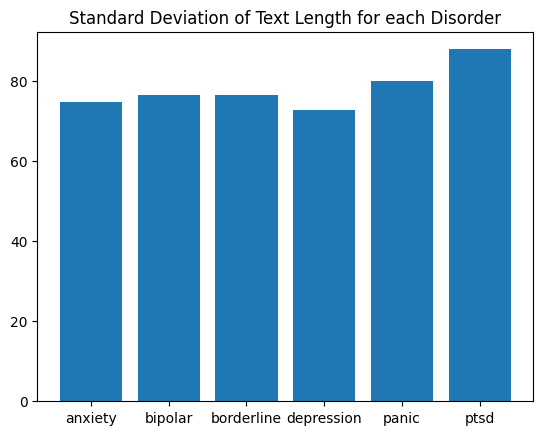

In [79]:
plt.bar(data.groupby('disorder')['text_length'].std().index, data.groupby('disorder')['text_length'].std())
plt.title('Standard Deviation of Text Length for each Disorder')
plt.show()

* Again, we can see that the distribution of the tweet lengths among the classes are similar. This information does not help us to distinguish the classes.
* However, you can see there exist a %10 percentage difference between the class 'depression' and the class 'ptsd'.

* We may say the users who have 'depression' disorder tend to write shorter tweets compared to the users who have 'ptsd' disorder. 

But this infered on the raw, uncleaned data. We may not see this difference after cleaning the data. 

Maybe depression class has some empty tweets which are not informative, and that is why the mean of the tweet lengths are shorter.

* Speaking of empty texts, let's check if we have any empty texts in the dataset.

In [86]:
data['text'].isna().sum()

0

* Maybe there were some empty texts in the dataset.

In [89]:
data['text'].apply(lambda x: x.strip()).isna().sum()

0

In [92]:
all(data['text'].apply(lambda x: x.strip()).apply(len)!=0)

True

* Ok, there were no empty texts in the dataset. We can check if we have any null values on other features.

In [93]:
for col in data.columns:
    print(col, data[col].isna().sum())

user_id 0
text 0
disorder 0
has_link 0
has_emoji 0
has_mention 0
text_length 0


* Now we know that we do not have any null values in the dataset.

### How many tweets are there per user?

- Maybe some users just tweet once and some tweet a lot. Let's check it.
- If they tweet more than once, is there any imbalance in the distribution of the tweet counts among the classes?

In [95]:
tweets_per_user = data.groupby('user_id')['text'].count()
tweets_per_user_class = data.groupby(['user_id', 'disorder'])['text'].count()

In [96]:
tweets_per_user.describe()

count    18169.000000
mean      1771.774341
std       1086.212460
min          1.000000
25%        852.000000
50%       1852.000000
75%       2642.000000
max      11822.000000
Name: text, dtype: float64

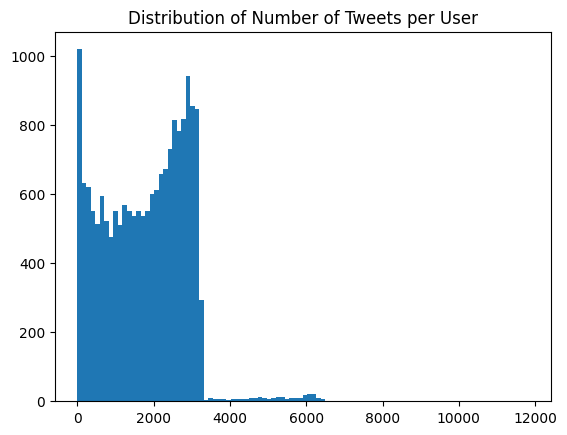

In [108]:
plt.hist(tweets_per_user, bins=100)
plt.title('Distribution of Number of Tweets per User')
plt.show()

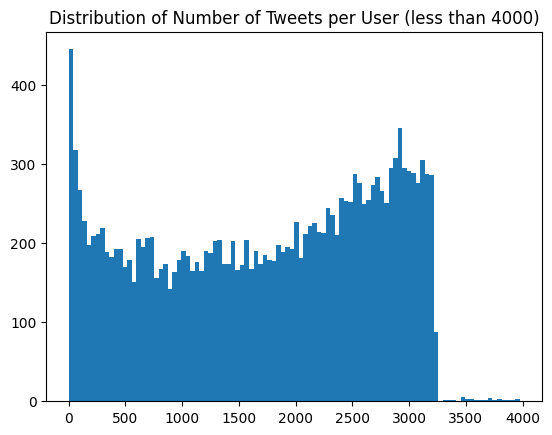

In [109]:
plt.hist(tweets_per_user[tweets_per_user<4000], bins=100)
plt.title('Distribution of Number of Tweets per User (less than 4000)')
plt.show()

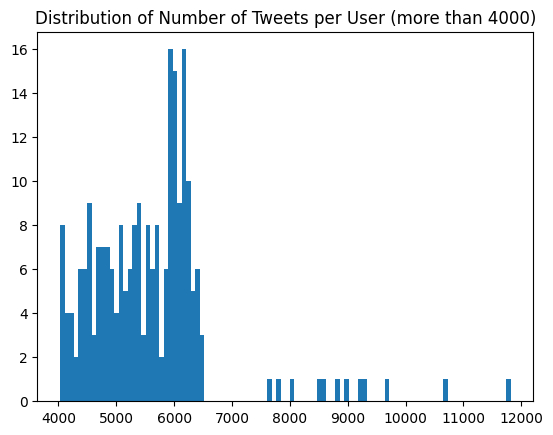

In [110]:
plt.hist(tweets_per_user[tweets_per_user>4000], bins=100)
plt.title('Distribution of Number of Tweets per User (more than 4000)')
plt.show()

* We can see a sharp cut near the 3500 tweets per user. Most of the users have less than 3500 tweets.
* Also, we can not observe a known distribution in the tweet counts per user. This makes it difficult to make a comment on the distribution of the tweet counts per user among the classes.

### Distribution of the classes among the users who have more than one disorder

* Does multi disorder users have a specific distribution among the classes? Do they have a bias towards a specific class? 

In [156]:
two_disorders = classes_per_user[classes_per_user==2].index

In [157]:
data[data['user_id'].isin(two_disorders)].groupby('user_id')['disorder'].value_counts()

user_id     disorder  
00021bdb1d  anxiety       2017
            depression    2011
00af7bdaf3  depression     283
            ptsd           264
01dc4cfe4f  depression    3228
                          ... 
fc44ec1d96  anxiety       1745
fd46f36655  depression    2906
            anxiety       2876
fea66933be  anxiety       2398
            ptsd          2376
Name: count, Length: 662, dtype: int64

In [158]:
ratios = data[data['user_id'].isin(two_disorders)].groupby('user_id')['disorder'].value_counts()/data[data['user_id'].isin(two_disorders)].groupby('user_id')['disorder'].count()

In [159]:
ratios

user_id     disorder  
00021bdb1d  anxiety       0.500745
            depression    0.499255
00af7bdaf3  depression    0.517367
            ptsd          0.482633
01dc4cfe4f  depression    0.500000
                            ...   
fc44ec1d96  anxiety       0.494755
fd46f36655  depression    0.502594
            anxiety       0.497406
fea66933be  anxiety       0.502304
            ptsd          0.497696
Length: 662, dtype: float64

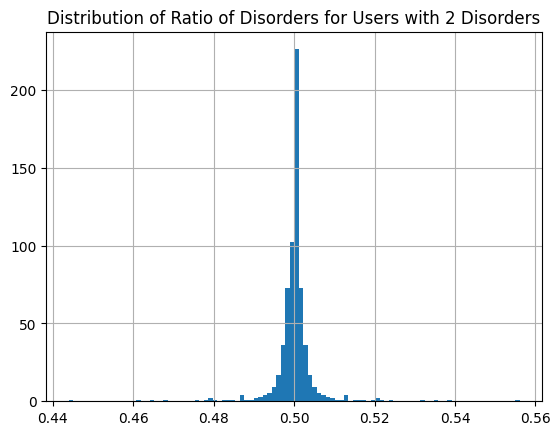

In [161]:
ratios.hist(bins=100)
plt.title('Distribution of Ratio of Disorders for Users with 2 Disorders')
plt.show()

* We can see that if a person has posted about more than one disorder, the ratio between the classes are similar. 
* This is a good thing, because a person is not biased towards a specific class if they belong to more than one class.

In [162]:
data

,user_id,text,disorder,has_link,has_emoji,has_mention,text_length
0,3f21058fc8,@amirulmokhtar Exactly! We were busy buat untu...,anxiety,False,True,True,83
1,3f21058fc8,Ternangis baca text &amp; dengar call reply di...,anxiety,False,True,False,230
2,3f21058fc8,I learn smthg very valuable today.\n\nWhen I w...,anxiety,False,True,False,284
3,3f21058fc8,"@MintKr Ohhh okay. So, to create more opportun...",anxiety,False,True,True,169
4,3f21058fc8,@MintKr Perspective expanding experience tu ap...,anxiety,False,True,True,53
...,...,...,...,...,...,...,...
32191363,c789b769d1,Peeps Don't forget to catch the braai show @SA...,bipolar,False,True,True,128
32191364,c789b769d1,@JohnnyGargano #fortheloveofGarganoway🔥💝,bipolar,False,True,True,40
32191365,c789b769d1,@Official_SABC1 @akaworldwide @malusi_gigaba D...,bipolar,False,True,True,98
32191366,c789b769d1,#TeamBreezyForever🔥💝💝😇#TeamBreezySA 🇿🇦💝#ChrisB...,bipolar,True,True,False,95


### Word Count of the Tweets

- Maybe the word count of the tweets can help us to distinguish the classes. Let's check it.

In [163]:
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

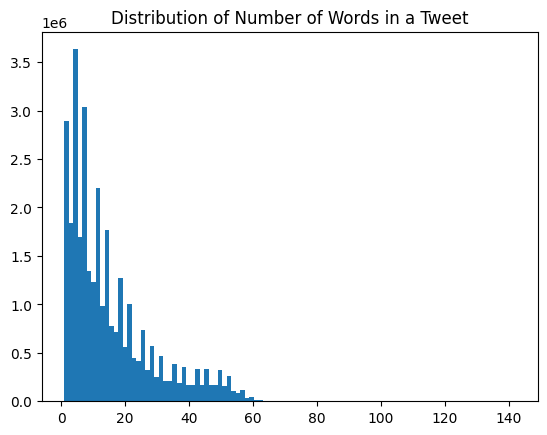

In [164]:
plt.hist(data['word_count'], bins=100)
plt.title('Distribution of Number of Words in a Tweet')
plt.show()

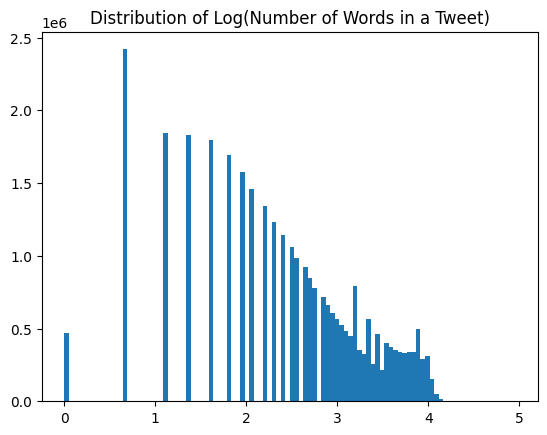

In [165]:
plt.hist(np.log(data['word_count']), bins=100)
plt.title('Distribution of Log(Number of Words in a Tweet)')
plt.show()

In [166]:
data['word_count'].describe()

count    3.219137e+07
mean     1.530133e+01
std      1.338579e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.100000e+01
max      1.420000e+02
Name: word_count, dtype: float64

In [185]:
data[data['word_count']>=30].disorder.value_counts()

disorder
depression    1941500
ptsd          1254399
anxiety        918342
bipolar        401127
borderline     156523
panic           81051
Name: count, dtype: int64

* Since nothing can be inferred from a text with only one word, we can say that the minimum word count should be 2.
* We can generalize this and say we will select only the tweets with more than n words. (for example 10)
* We can use this information while cleaning the data.

* Let's check the distribution of the word counts of the tweets per class.

In [186]:
data.groupby('disorder')['word_count'].mean()

disorder
anxiety       14.702126
bipolar       15.916968
borderline    16.322540
depression    14.620394
panic         15.956402
ptsd          16.925296
Name: word_count, dtype: float64

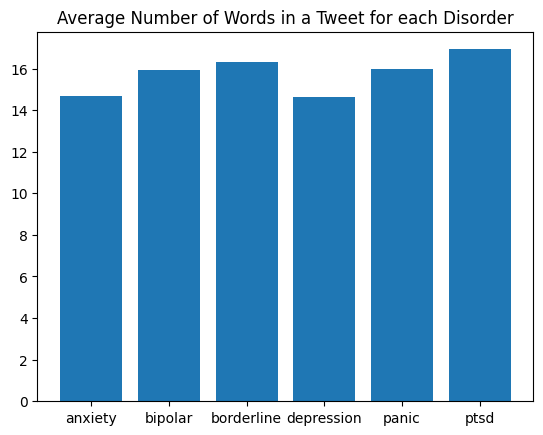

In [189]:
plt.bar(data.groupby('disorder')['word_count'].mean().index, data.groupby('disorder')['word_count'].mean())
plt.title('Average Number of Words in a Tweet for each Disorder')
plt.show()

* We can see that the distribution of the word counts of the tweets per class are similar. This information does not help us to distinguish the classes.

* Since columns 'text_length' and 'word_count' are highly correlated, it is not surprizing that we have a similar plot for the word counts of the tweets per class.

## Checking the correlation between the features

* Maybe some features are correlated with each other. Let's check it.

* As we have seen above, most of the hand crafted features do not have a significance with the target feature. That's why we do not expect to see a high correlation between the features and target.

In [191]:
## encode the target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['disorder_le'] = le.fit_transform(data['disorder'])


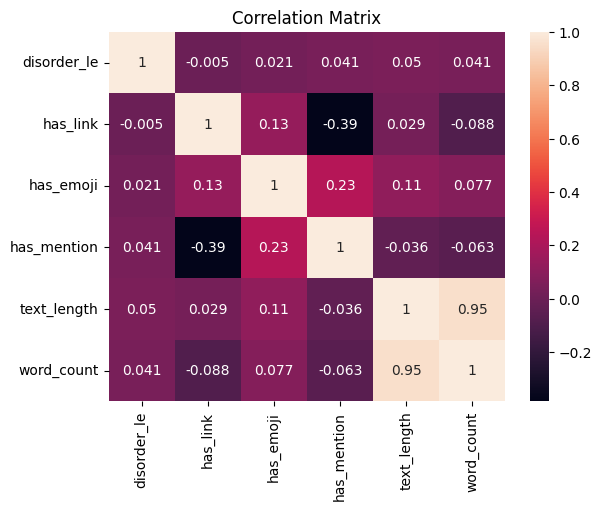

In [194]:
sns.heatmap(data[['disorder_le', 'has_link', 'has_emoji', 'has_mention', 'text_length', 'word_count']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

* We can see that the 'word_count' and 'text_length' are highly correlated with each other. This is not surprizing since the length of the text is directly related to the word count of the text.

* There are no strong correaltions between the features and target. This is not surprizing since we have seen that the hand crafted features do not have a significance with the target feature.

* There is a surprizing correlation between 'has_mention' and 'has_link'. This is not expected.

* Also, another surprizing correlation is between 'has_emoji' and 'has_mention'. This is not expected too.


### Word Clouds

- Maybe we can see some patterns in the word clouds. Let's check it.

# Conclusion:

- We have done some exploratory data analysis on the Twitter Mental Disorder Tweets dataset. We have checked the distribution of the features and their correlations with the target feature. We have seen that the hand crafted features do not have a significance with the target feature. That's why we do not expect to see a high correlation between the features and target.

- We have seen that the dataset is imbalanced. We have seen that the distribution of the features are similar among the classes. This information does not help us to distinguish the classes.

- Even though the dataset do not contain any null values, it is NOT clean when we consider the textual data from a NLP perspective. Some of the tweets are just links, some of them are empty, some of them are too short, some of them are too long. We will try to make the data more clean while data sampling phase.